In [1]:
import pandas as pd
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

años = ["2018", "2019", "2020", "2021", "2022", "2023", "2024"]
dataframes = {}
for a in años:
    dataframes[a] = pd.read_csv(filepath_or_buffer=f'./{a}.csv', 
                    delimiter=';', 
                    decimal=',',
                    header=0)

In [4]:
m = 431
df = dataframes["2023"]
estaciones = df[df.magnitud == m]
#estaciones.loc[:,["municipio","estacion"]]
estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)
e_2023 = estaciones.combinada.values
#estaciones.municipio.unique()

C:\Users\victo\AppData\Local\Temp\ipykernel_25488\2504584682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)


In [135]:

df = dataframes["2022"]
estaciones = df[df.magnitud == m]
#estaciones.estacion.unique()
#estaciones.municipio.unique()
estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)
e_2022 = estaciones.combinada.values

NameError: name 'm' is not defined

In [191]:
df = dataframes["2021"]
estaciones = df[df.magnitud == m]
#estaciones.estacion.unique()
estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)
e_2021 = estaciones.combinada.values

C:\Users\victo\AppData\Local\Temp\ipykernel_25192\2751040396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)


In [192]:
df = dataframes["2020"]
estaciones = df[df.magnitud == m]
#estaciones.estacion.unique()
estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)
e_2020 = estaciones.combinada.values


C:\Users\victo\AppData\Local\Temp\ipykernel_25192\2757301507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)


In [193]:
df = dataframes["2019"]
estaciones = df[df.magnitud == m]
#estaciones.estacion.unique()
estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)
e_2019 = estaciones.combinada.values

C:\Users\victo\AppData\Local\Temp\ipykernel_25192\2101084133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)


In [194]:
df = dataframes["2018"]
estaciones = df[df.magnitud == m]
#estaciones.estacion.unique()
estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)
e_2018 = estaciones.combinada.values


C:\Users\victo\AppData\Local\Temp\ipykernel_25192\4183792437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)


In [195]:
df = dataframes["2024"]
estaciones = df[df.magnitud == m]
#estaciones.estacion.unique()
estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)
e_2021 = estaciones.combinada.values

C:\Users\victo\AppData\Local\Temp\ipykernel_25192\1574149738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones['combinada'] = df.apply(lambda row: (row['municipio'], row['estacion']), axis=1)


In [196]:
i = np.intersect1d(e_2023, e_2022)
i = np.intersect1d(i, e_2021)
i = np.intersect1d(i, e_2020)
i = np.intersect1d(i, e_2019)
i = np.intersect1d(i, e_2018)
i

array([(6, 4), (16, 1), (47, 2), (58, 4)], dtype=object)

In [199]:
i_1 = np.array([(5, 2), (16, 1), (47, 2), (92, 5), (102, 1), (171, 1)])
i_2 = np.array([(5, 2), (16, 1), (45, 2), (92, 5), (102, 1), (171, 1)])
i_7 = np.array([(5, 2), (6, 4), (7, 4), (9, 1), (13, 2), (14, 2), (16, 1), (45, 2),
       (47, 2), (49, 3), (58, 4), (65, 14), (67, 1), (74, 7), (80, 3),
       (92, 5), (102, 1), (120, 1), (123, 2), (133, 2), (148, 4),
       (161, 1), (171, 1), (180, 1)])
i_8 = np.array([(5, 2), (6, 4), (7, 4), (9, 1), (13, 2), (14, 2), (16, 1), (45, 2),
       (47, 2), (49, 3), (58, 4), (65, 14), (67, 1), (74, 7), (80, 3),
       (92, 5), (102, 1), (120, 1), (123, 2), (133, 2), (148, 4),
       (161, 1), (171, 1), (180, 1)])
i_9 = np.array([(5, 2), (7, 4), (9, 1), (16, 1), (47, 2), (49, 3), (65, 14),
       (74, 7), (120, 1), (148, 4), (161, 1), (171, 1), (180, 1)])
i_10 = np.array([(5, 2), (6, 4), (13, 2), (14, 2), (16, 1), (45, 2), (49, 3),
       (58, 4), (65, 14), (67, 1), (74, 7), (80, 3), (92, 5), (102, 1),
       (120, 1), (123, 2), (133, 2), (148, 4), (171, 1)])
i_11 = np.array([(5, 2), (6, 4), (7, 4), (9, 1), (13, 2), (14, 2), (16, 1), (45, 2),
       (47, 2), (49, 3), (58, 4), (65, 14), (67, 1), (74, 7), (80, 3),
       (92, 5), (102, 1), (120, 1), (123, 2), (133, 2), (148, 4),
       (161, 1), (171, 1), (180, 1)])
i_12 = np.array([(5, 2), (6, 4), (7, 4), (9, 1), (13, 2), (14, 2), (16, 1), (45, 2),
       (47, 2), (49, 3), (58, 4), (65, 14), (67, 1), (74, 7), (80, 3),
       (92, 5), (102, 1), (120, 1), (123, 2), (133, 2), (148, 4),
       (161, 1), (171, 1), (180, 1)])
i_14 = np.array([(5, 2), (6, 4), (7, 4), (9, 1), (13, 2), (14, 2), (16, 1), (45, 2),
       (47, 2), (49, 3), (58, 4), (65, 14), (67, 1), (74, 7), (80, 3),
       (92, 5), (102, 1), (120, 1), (123, 2), (133, 2), (148, 4),
       (161, 1), (171, 1), (180, 1)])
i_20 = np.array([(6, 4), (16, 1), (47, 2), (58, 4)])
i_22 = np.array([(5, 2), (6, 4), (7, 4), (9, 1), (13, 2), (14, 2), (16, 1), (45, 2),
       (47, 2), (49, 3), (58, 4), (65, 14), (67, 1), (74, 7), (80, 3),
       (92, 5), (102, 1), (120, 1), (123, 2), (133, 2), (148, 4),
       (161, 1), (171, 1), (180, 1)])
i_30 = np.array([(6, 4), (16, 1), (47, 2), (58, 4)])
i_42 = np.array([(6, 4), (16, 1), (47, 2), (58, 4)])
i_44 = np.array([(6, 4), (16, 1), (47, 2), (58, 4)])
i_431 = np.array([(6, 4), (16, 1), (47, 2), (58, 4)])




Filtramos las filas que analizan alguno de los contaminantes 7,8,10,11,12,14,22

In [2]:
#magnitudes = [7, 8, 10, 11, 12, 14, 22]
magnitudes = [8, 14, 10]
for a in dataframes:
    df = dataframes[a]
    dataframes[a] = df[df.magnitud.isin(magnitudes)]
   
dataframes["2022"]


,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
3,28,102,1,8,28102001_8_8,2022,1,1,8.0,V,...,16.0,V,15.0,V,12.0,V,10.0,V,9.0,V
4,28,102,1,10,28102001_10_49,2022,1,1,5.0,V,...,9.0,V,7.0,V,6.0,V,5.0,V,6.0,V
6,28,102,1,14,28102001_14_6,2022,1,1,59.0,V,...,49.0,V,50.0,V,52.0,V,54.0,V,56.0,V
8,28,120,1,8,28120001_8_8,2022,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
10,28,120,1,10,28120001_10_49,2022,1,1,1.0,V,...,1.0,V,2.0,V,2.0,V,1.0,V,1.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58282,28,9,1,8,28009001_8_8,2022,12,31,12.0,V,...,39.0,V,22.0,V,18.0,V,19.0,V,13.0,V
58285,28,9,1,14,28009001_14_6,2022,12,31,50.0,V,...,34.0,V,36.0,V,48.0,V,39.0,V,47.0,V
58289,28,92,5,8,28092005_8_8,2022,12,31,19.0,V,...,89.0,V,83.0,V,78.0,V,73.0,V,71.0,V
58290,28,92,5,10,28092005_10_49,2022,12,31,23.0,V,...,46.0,V,50.0,V,47.0,V,44.0,V,54.0,V


Nos quedamos con las siguientes estaciones (5, 2), (6, 4), (13, 2), (14, 2), (16, 1), (45, 2), (49, 3),
    (58, 4), (65, 14), (67, 1), (74, 7), (80, 3), (92, 5), (102, 1),
    (120, 1), (123, 2), (133, 2), (148, 4), (171, 1)


In [3]:
#est = [(5, 2), (6, 4), (13, 2), (14, 2), (16, 1), (45, 2), (49, 3),
#       (58, 4), (65, 14), (67, 1), (74, 7), (80, 3), (92, 5), (102, 1),
#       (120, 1), (123, 2), (133, 2), (148, 4), (171, 1)]

est = [(74,7), (148,4), (67,1)]

for a in dataframes:
    df = dataframes[a]
    dataframes[a] = df[df.apply(lambda row: (row['municipio'], row['estacion']) in est, axis=1)]

#dataframes["2020"]
   


Quitamos las columnas que no aportan información para entrenar la red neuronal 

In [4]:

for a in dataframes:
    df = dataframes[a]
    dataframes[a] = df.drop(['provincia', 'punto_muestreo'], axis = 1)

dataframes["2020"]

,municipio,estacion,magnitud,ano,mes,dia,h01,v01,h02,v02,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
34,148,4,8,2020,1,1,42.0,V,41.0,V,...,83.0,V,53.0,V,55.0,V,48.0,V,39.0,V
36,148,4,10,2020,1,1,NaN,N,NaN,N,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
38,148,4,14,2020,1,1,5.0,V,4.0,V,...,6.0,V,5.0,V,5.0,V,4.0,V,4.0,V
128,67,1,8,2020,1,1,27.0,V,28.0,V,...,37.0,V,33.0,V,32.0,V,29.0,V,24.0,V
129,67,1,10,2020,1,1,25.0,V,41.0,V,...,42.0,V,38.0,V,37.0,V,33.0,V,32.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58529,67,1,10,2020,12,31,22.0,V,23.0,V,...,35.0,V,21.0,V,15.0,V,7.0,V,14.0,V
58531,67,1,14,2020,12,31,33.0,V,34.0,V,...,37.0,V,41.0,V,70.0,V,69.0,V,60.0,V
58538,74,7,8,2020,12,31,18.0,V,11.0,V,...,15.0,V,13.0,V,9.0,V,9.0,V,15.0,V
58540,74,7,10,2020,12,31,13.0,V,8.0,V,...,5.0,V,5.0,V,5.0,V,3.0,V,3.0,V


PASOS A SEGUIR 
Contar mediciones válidas respecto del total (idealmenete deberían coincidir)
Filtrar los datos validos(varias opciones): 
-Borrar fila si medición no es válida 
-Reparar dato: 
        - media entre dato anterior y posterior
        - utilizar dato del año anterior o posterior 


Comprobamos que no todas las mediciones son válidas y sustituimos aquellas que no lo son por la  
media entre la medición de la hora anterior y la medición de la hora posterior 

Antes de aplicar PCA sobre los datos para confirmar nuestra intuición, realizamos la visualización de los datos para buscar patrones en la evolución de los mismos. Seleccionamos tres contaminantes distintos Dióxido de Nitrógeno, Ozono y Partículas en Suspensión PM<10 en tres localidades distintas Leganés(74,7), Torrejón de Ardoz(148,4), Guadalix de la Sierra(67,1) y Aranjuez(13,2). 


Patrones anuales: Para cada estación plotear evolución de los 3 contaminantes a lo largo de los años (podemos hacer tres subgraficas o los tres contaminantes en una)

Eliminamos primero todas las columnas que no contengan datos de interés para la gráfica y convertimos las columnas 
que determinan el valor de los contaminantes a cada hora en filas. 

 Seleccionamos tres contaminantes distintos Dióxido de Nitrógeno(8), Ozono(14) y Partículas en Suspensión PM<10(10) en tres localidades distintas Leganés(74,7), Torrejón de Ardoz(148,4), Guadalix de la Sierra(67,1) y Aranjuez(13,2)

In [5]:
#Leganés (74,7)
leg_N = {}
leg_O = {}
leg_P = {}
for a in años:
    df = dataframes[a]
    leg_N[a]= df[(df['municipio'] == 74) & 
                         (df['estacion'] == 7) & 
                         (df['magnitud'] == 8)]
    leg_O[a]= df[(df['municipio'] == 74) & 
                         (df['estacion'] == 7) & 
                         (df['magnitud'] == 14)]
    leg_P[a]= df[(df['municipio'] == 74) & 
                         (df['estacion'] == 7) & 
                         (df['magnitud'] == 10)]
#Torrejón de Ardoz (148, 4)
torr_N = {}
torr_O = {}
torr_P = {}
for a in años:
    df = dataframes[a]
    torr_N[a]= df[(df['municipio'] == 148) & 
                         (df['estacion'] == 4) & 
                         (df['magnitud'] == 8)]
    torr_O[a]= df[(df['municipio'] == 148) & 
                         (df['estacion'] == 4) & 
                         (df['magnitud'] == 14)]
    torr_P[a]= df[(df['municipio'] == 148) & 
                         (df['estacion'] == 4) & 
                         (df['magnitud'] == 10)]

#Guadalix de la Sierra (67, 1)
guad_N = {}
guad_O = {}
guad_P = {}
for a in años:
    df = dataframes[a]
    guad_N[a]= df[(df['municipio'] == 67) & 
                         (df['estacion'] == 1) & 
                         (df['magnitud'] == 8)]
    guad_O[a]= df[(df['municipio'] == 67) & 
                         (df['estacion'] == 1) & 
                         (df['magnitud'] == 14)]
    guad_P[a]= df[(df['municipio'] == 67) & 
                         (df['estacion'] == 1) & 
                         (df['magnitud'] == 10)]


#Creamos una lista con todos los datframes para limpiarlos 
df_loc_mag = [leg_N, leg_O, leg_P, torr_N, torr_O, torr_P, guad_N, guad_O, guad_P]



In [33]:
df = guad_N["2018"]
#Calculamos cuantos valores no válidos hay 

df_valido = df.filter(regex="h??")
n = df_valido.isin([np.NaN])
n.sum()


municipio     0
estacion      0
magnitud      0
ano           0
mes           0
dia           0
h01           2
v01           0
h02           2
v02           0
h03           3
v03           0
h04           2
v04           0
h05           2
v05           0
h06           2
v06           0
h07           4
v07           0
h08          11
v08           0
h09          14
v09           0
h10           5
v10           0
h11           6
v11           0
h12          14
v12           0
h13          13
v13           0
h14           2
v14           0
h15           2
v15           0
h16           2
v16           0
h17           2
v17           0
h18           2
v18           0
h19           2
v19           0
h20           2
v20           0
h21           2
v21           0
h22           2
v22           0
h23           2
v23           0
h24           2
v24           0
dtype: int64

Sustituimos los valores no válidos(N) y los valores Nan por la media de los valores a dicha hora a lo largo del año 

In [6]:
###### En la celda anterior debería copiar el dataframe?

str_val = [f'v{str(i).zfill(2)}' for i in range(1, 25)]
str_horas = [f'h{str(i).zfill(2)}' for i in range(1, 25)]



def limpia_df(df):
    for i in range(0,24): 
        val = str_val[i]
        hora = str_horas[i]
        #Cambiamos valores no válidos
        df_val = df[df[val] == "V"]
        ind_v = df.index[df[val] == 'N'].tolist()
        df.loc[ind_v, val] = "V"
        df.loc[ind_v, hora] = df_val[hora].mean()
        #Sustituimos los valores Nan 
        ind_nan = df.index[df[hora] == np.NaN].tolist() 
        df.loc[ind_nan, hora] = df_val[hora].mean()
    

for d in df_loc_mag:
    for a in años:
        df = d[a]
        limpia_df(df)


     




In [7]:
#Prueba de que se ha llevado a cabo correctamente la limpieza
df = guad_N["2018"]
#Calculamos cuantos valores no válidos hay 

df_valido = df.filter(regex="h??")
n = df_valido.isin([np.NaN])
n.sum()


municipio    0
estacion     0
magnitud     0
ano          0
mes          0
dia          0
h01          0
v01          0
h02          0
v02          0
h03          0
v03          0
h04          0
v04          0
h05          0
v05          0
h06          0
v06          0
h07          0
v07          0
h08          0
v08          0
h09          0
v09          0
h10          0
v10          0
h11          0
v11          0
h12          0
v12          0
h13          0
v13          0
h14          0
v14          0
h15          0
v15          0
h16          0
v16          0
h17          0
v17          0
h18          0
v18          0
h19          0
v19          0
h20          0
v20          0
h21          0
v21          0
h22          0
v22          0
h23          0
v23          0
h24          0
v24          0
dtype: int64

In [10]:
data_visual = {}
str_val = ["v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10", "v11", "v12", "v13", "v14", "v15", "v16", "v17", "v18", "v19", "v20", "v21", "v22", "v23", "v24"]
str_horas = [f'h{str(i).zfill(2)}' for i in range(1, 25)]

def transf_valor_unico(df):  
    df_unico = pd.melt(df, id_vars=['municipio', 'estacion', 'magnitud', 'ano', 'mes', 'dia'],
                      value_vars=str_horas, var_name='hora', value_name='valor')
    df_unico = df_unico.rename(columns={'ano': 'year', 'mes': 'month', 'dia': 'day'})
    df_unico['hora_num'] = df_unico['hora'].str[1:].astype(int)
    df_unico['fecha'] = pd.to_datetime(df_unico[['year', 'month', 'day']]) + pd.to_timedelta(df_unico['hora_num'] - 1, unit='h')
    df_unico = df_unico.sort_values(by='fecha')
    df_unico = df_unico.rename(columns={'year': 'año'})
    return df_unico

for d in df_loc_mag:
    for a in años:
        df = d[a].drop(columns=str_val)
        df_t = transf_valor_unico(df)
        d[a] = df_t


KeyError: "['v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24'] not found in axis"

In [11]:
df_loc_mag[2]["2020"]


,municipio,estacion,magnitud,año,month,day,hora,valor,hora_num,fecha
0,74,7,10,2020,1,1,h01,73.0,1,2020-01-01 00:00:00
366,74,7,10,2020,1,1,h02,127.0,2,2020-01-01 01:00:00
732,74,7,10,2020,1,1,h03,151.0,3,2020-01-01 02:00:00
1098,74,7,10,2020,1,1,h04,143.0,4,2020-01-01 03:00:00
1464,74,7,10,2020,1,1,h05,124.0,5,2020-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
7319,74,7,10,2020,12,31,h20,5.0,20,2020-12-31 19:00:00
7685,74,7,10,2020,12,31,h21,5.0,21,2020-12-31 20:00:00
8051,74,7,10,2020,12,31,h22,5.0,22,2020-12-31 21:00:00
8417,74,7,10,2020,12,31,h23,3.0,23,2020-12-31 22:00:00


Para cada localidad y magnitud sustiuimos aquellos valores no válidos por la media de los valores a esa determinada hora a lo largo del año. 

Obtenemos las gráficas que muestran la evolución de cada contaminante en cada una de las localidades 
a lo largo de los años.

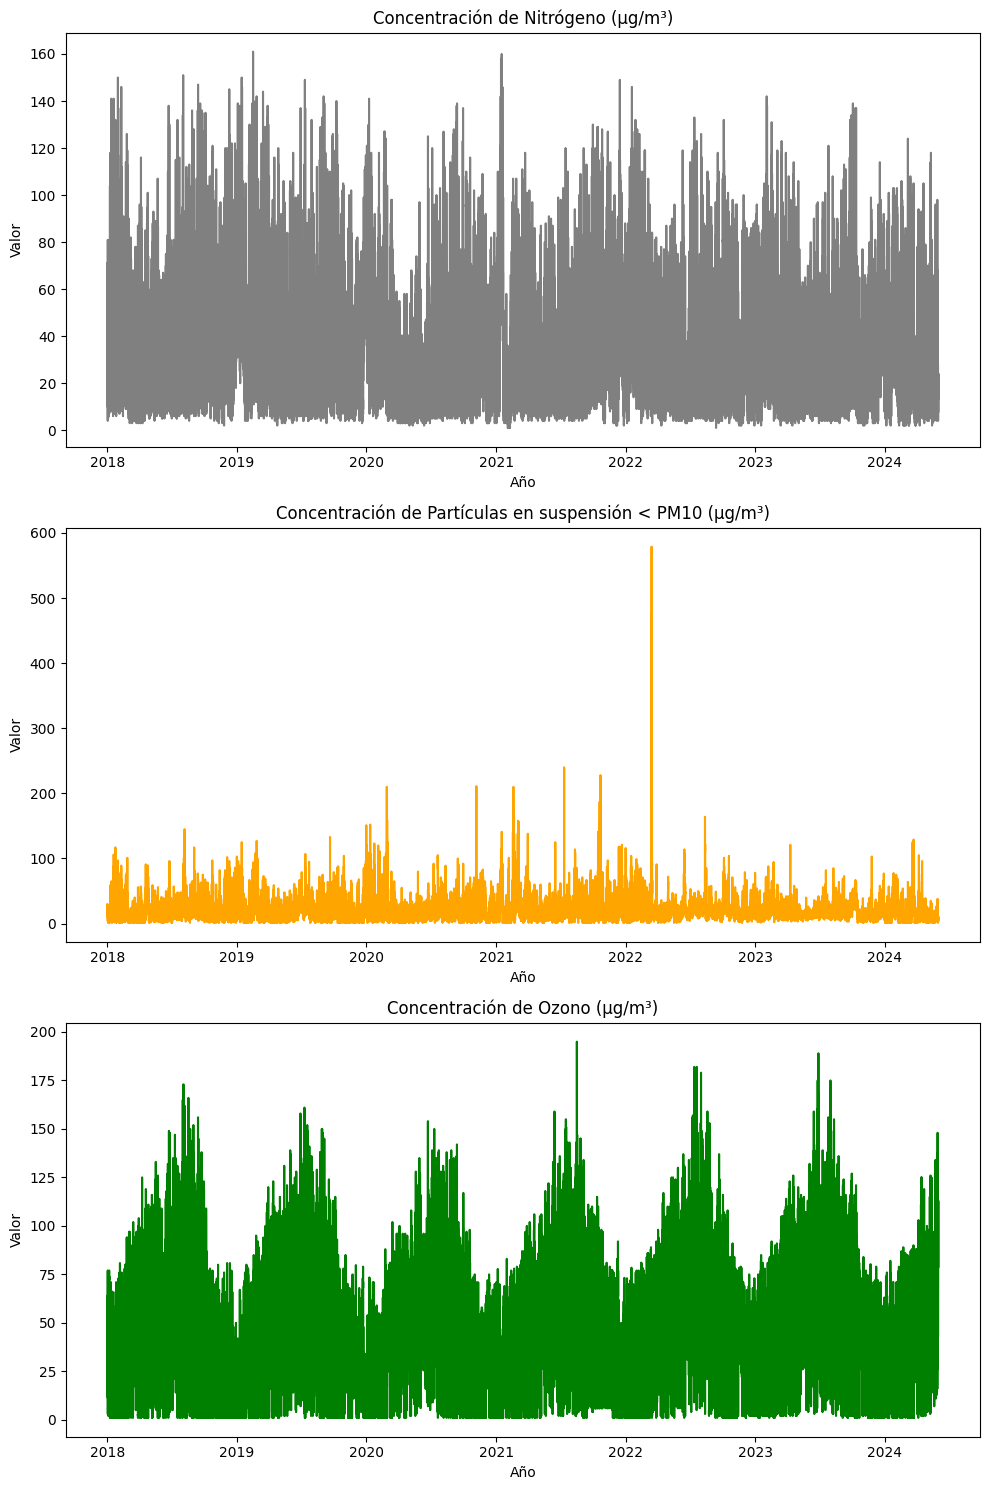

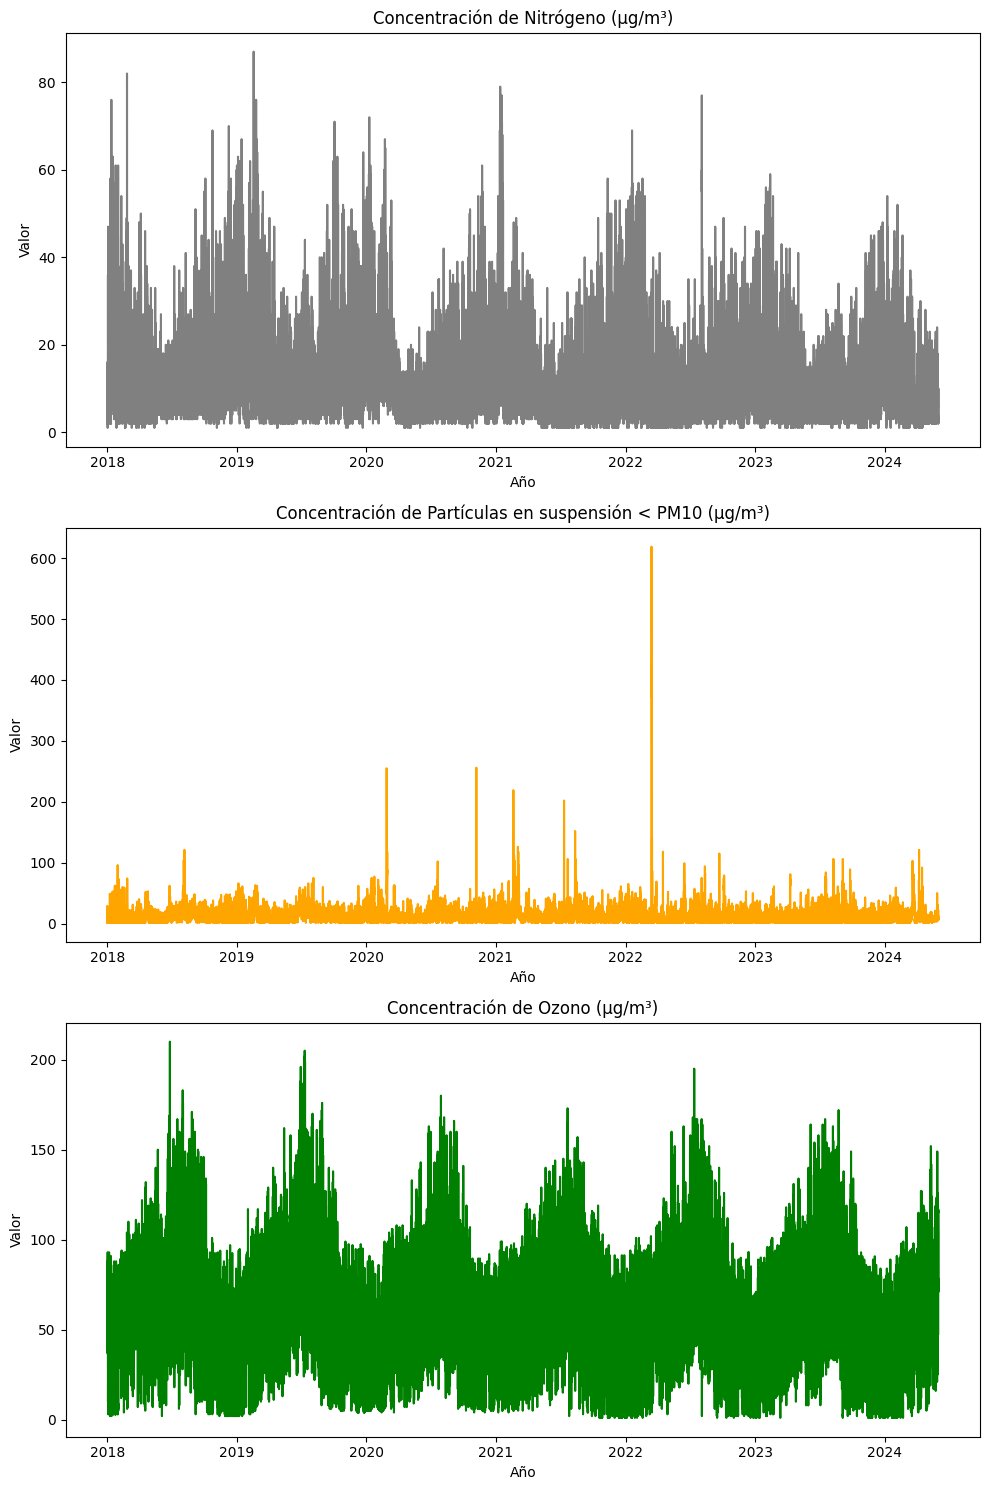

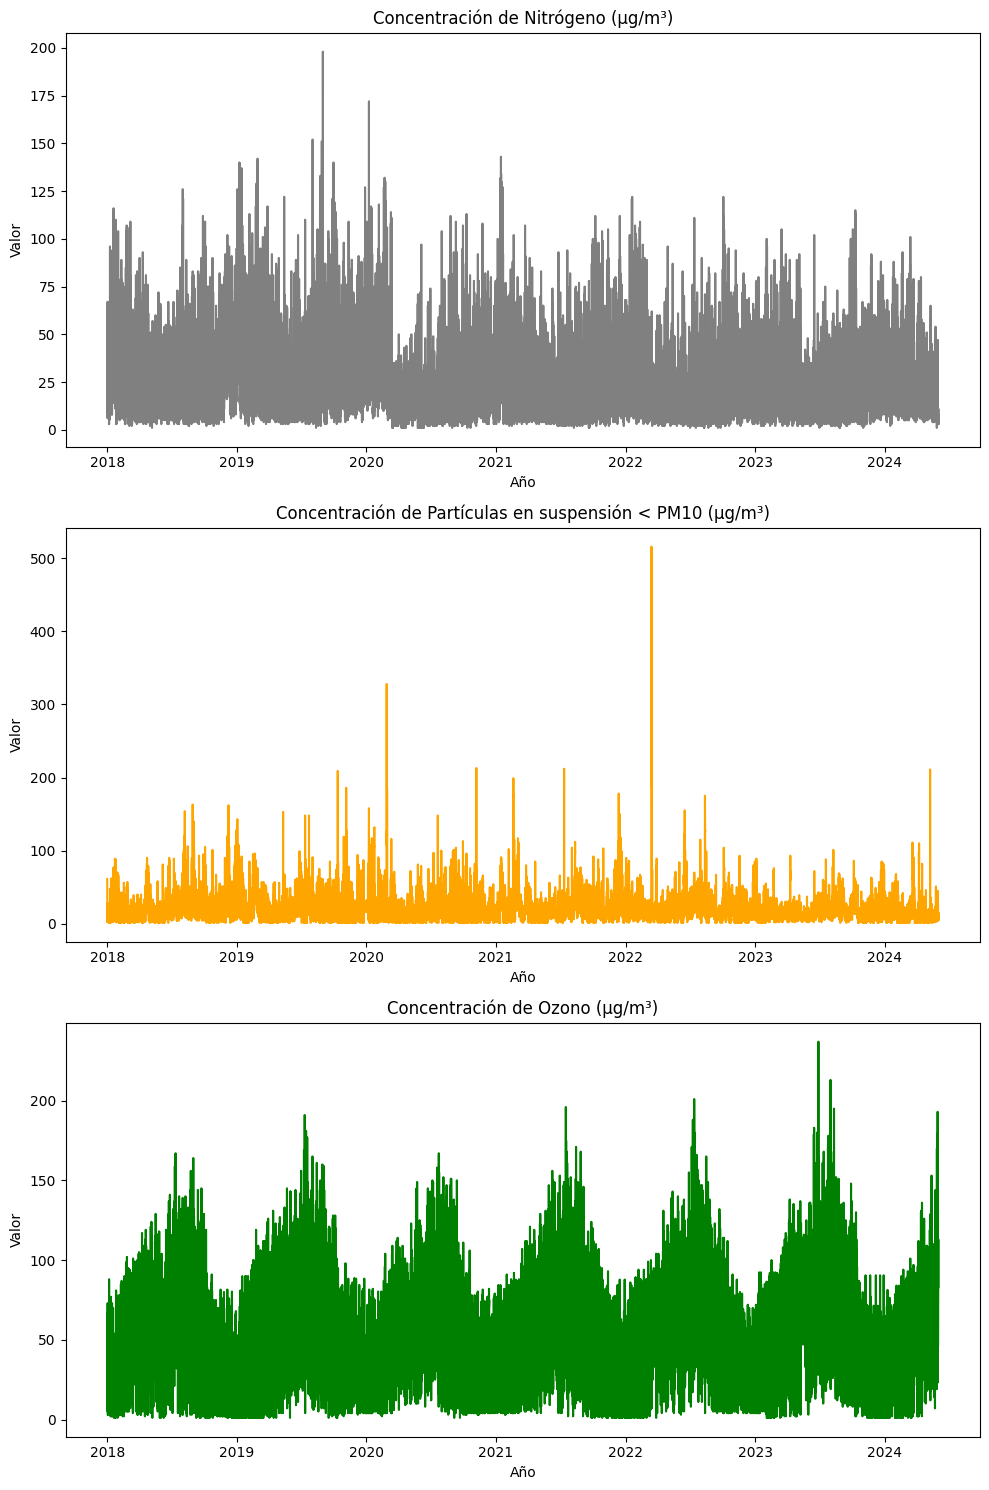

In [43]:


def visualiza_localidad(localidad):
        
    fig, axs = plt.subplots(3,1, figsize=(10, 15))
    
    for a in años:
        if localidad == "Leganes":
            df_N = leg_N[a]
            df_P = leg_P[a]
            df_O = leg_O[a]
        elif localidad == "Guadalix":
            df_N = guad_N[a]
            df_P = guad_P[a]
            df_O = guad_O[a]
        elif localidad == "Torrejon":
            df_N = torr_N[a]
            df_P = torr_P[a]
            df_O = torr_O[a]

        # Graficamos valores de Nitrógeno 
        axs[0].plot(df_N['fecha'], df_N['valor'], label='N', color='grey')
        axs[0].set_title('Concentración de Nitrógeno (µg/m³)')
        axs[0].set_ylabel('Valor')
        axs[0].set_xlabel('Año')
        #axs[0].legend()


        # Graficamos Partículas en suspensión < PM10
        axs[1].plot(df_P['fecha'], df_P['valor'], label='P', color='orange')
        axs[1].set_title('Concentración de Partículas en suspensión < PM10 (µg/m³)')
        axs[1].set_ylabel('Valor')
        axs[1].set_xlabel('Año')
        #axs[1].legend()

        # Graficamos Ozono
        axs[2].plot(df_O['fecha'], df_O['valor'], label='O', color='green')
        axs[2].set_title('Concentración de Ozono (µg/m³)')
        axs[2].set_ylabel('Valor')
        axs[2].set_xlabel('Año')
        #axs[2].legend()

    # Ajustar el espaciado entre subplots
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()
    return fig, axs 


fig1, ax1 = visualiza_localidad("Leganes")
fig2, ax2 = visualiza_localidad("Guadalix")
fig3, ax2 = visualiza_localidad("Torrejon")



REUNION 27/7/2024
- Poner en superposicion las gráficas de las tres ciudades por sustancia 
- Hacer diagrama de cubos
- Ver teoría series temporales 
- Gráfica de autocorrelación para los tres contaminantes y las tres estaciones 

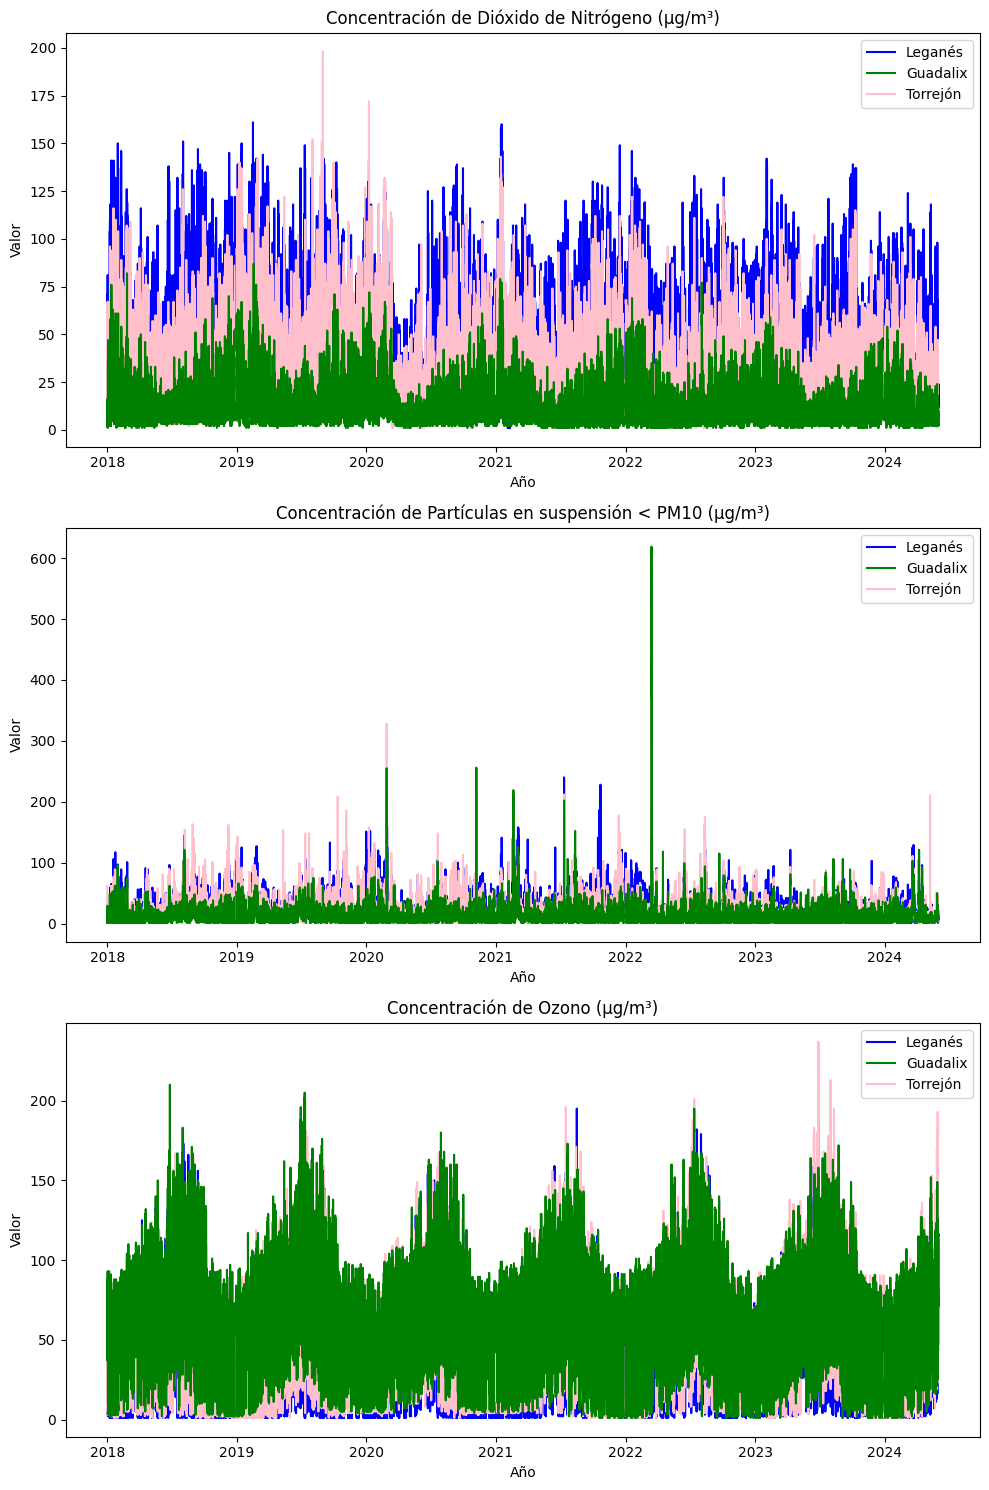

In [14]:

def visualiza_contaminante():
        
    fig, axs = plt.subplots(3,1, figsize=(10, 15))
    
    for a in años:
        # Graficamos valores de Nitrógeno 
        axs[0].plot(leg_N[a]['fecha'], leg_N[a]['valor'], color='blue', alpha=1)
        
        axs[0].plot(torr_N[a]['fecha'], torr_N[a]['valor'], color='pink', alpha=1)
        axs[0].plot(guad_N[a]['fecha'], guad_N[a]['valor'], color='green', alpha=1)
        axs[0].set_title('Concentración de Dióxido de Nitrógeno (µg/m³)')
        axs[0].set_ylabel('Valor')
        axs[0].set_xlabel('Año')
        
        # Graficamos Partículas en suspensión < PM10
        axs[1].plot(leg_P[a]['fecha'], leg_P[a]['valor'], color='blue', alpha=1)
        
        axs[1].plot(torr_P[a]['fecha'], torr_P[a]['valor'], color='pink', alpha=1)
        axs[1].plot(guad_P[a]['fecha'], guad_P[a]['valor'], color='green', alpha=1)
        axs[1].set_title('Concentración de Partículas en suspensión < PM10 (µg/m³)')
        axs[1].set_ylabel('Valor')
        axs[1].set_xlabel('Año')

        # Graficamos Ozono
        axs[2].plot(leg_O[a]['fecha'], leg_O[a]['valor'], color='blue', alpha=1)
     
        axs[2].plot(torr_O[a]['fecha'], torr_O[a]['valor'], color='pink', alpha=1)
        axs[2].plot(guad_O[a]['fecha'], guad_O[a]['valor'], color='green', alpha=1)
        axs[2].set_title('Concentración de Ozono (µg/m³)')
        axs[2].set_ylabel('Valor')
        axs[2].set_xlabel('Año')
    
    #Añadir leyenda
    axs[0].plot([], [], label='Leganés', color='blue')
    axs[0].plot([], [], label='Guadalix', color='green')
    axs[0].plot([], [], label='Torrejón', color='pink')
    axs[0].legend()

    axs[1].plot([], [], label='Leganés', color='blue')
    axs[1].plot([], [], label='Guadalix', color='green')
    axs[1].plot([], [], label='Torrejón', color='pink')
    axs[1].legend()

    axs[2].plot([], [], label='Leganés', color='blue')
    axs[2].plot([], [], label='Guadalix', color='green')
    axs[2].plot([], [], label='Torrejón', color='pink')
    axs[2].legend()
    
    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    plt.savefig('serie_conc_loc.png', dpi=300, bbox_inches='tight')  # Cambia el nombre de archivo y el formato según sea necesario

    # Mostrar la gráfica
    plt.show()
   
visualiza_contaminante()

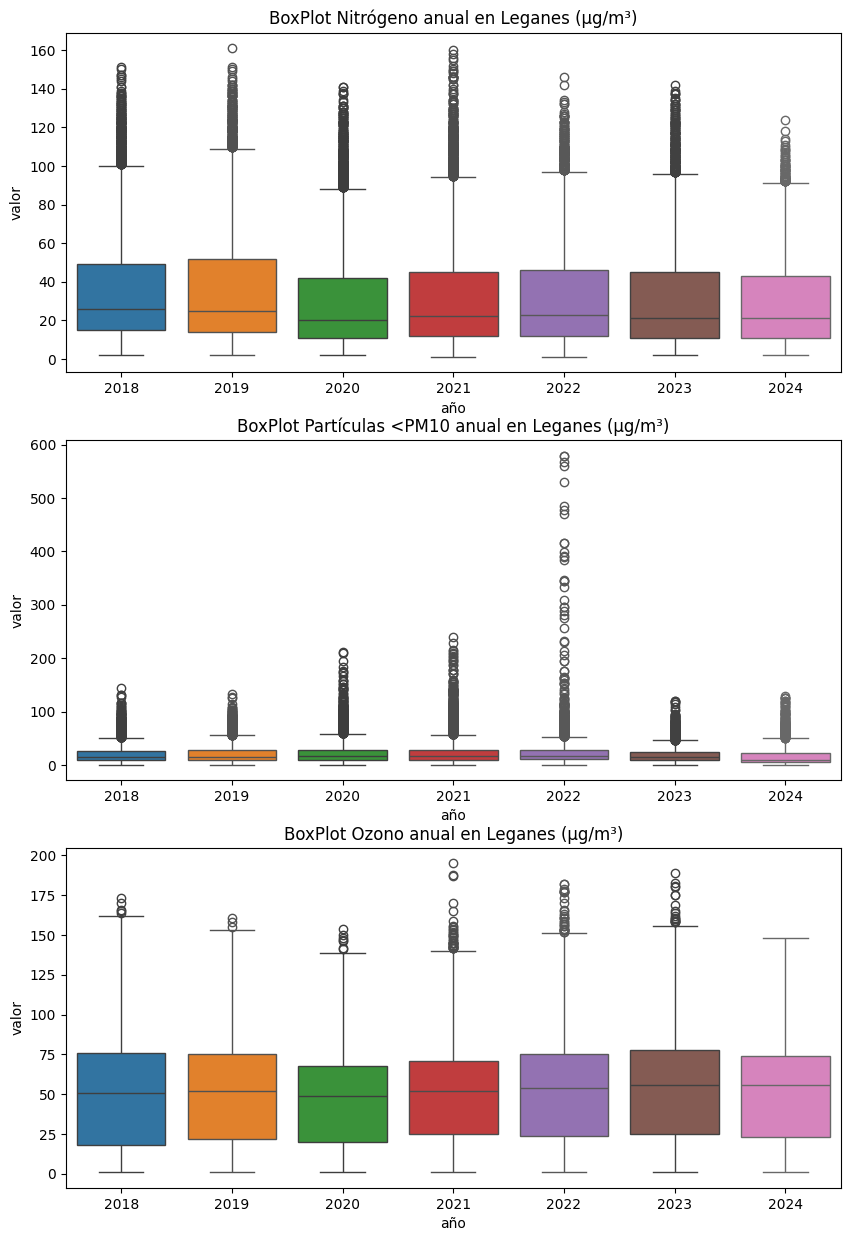

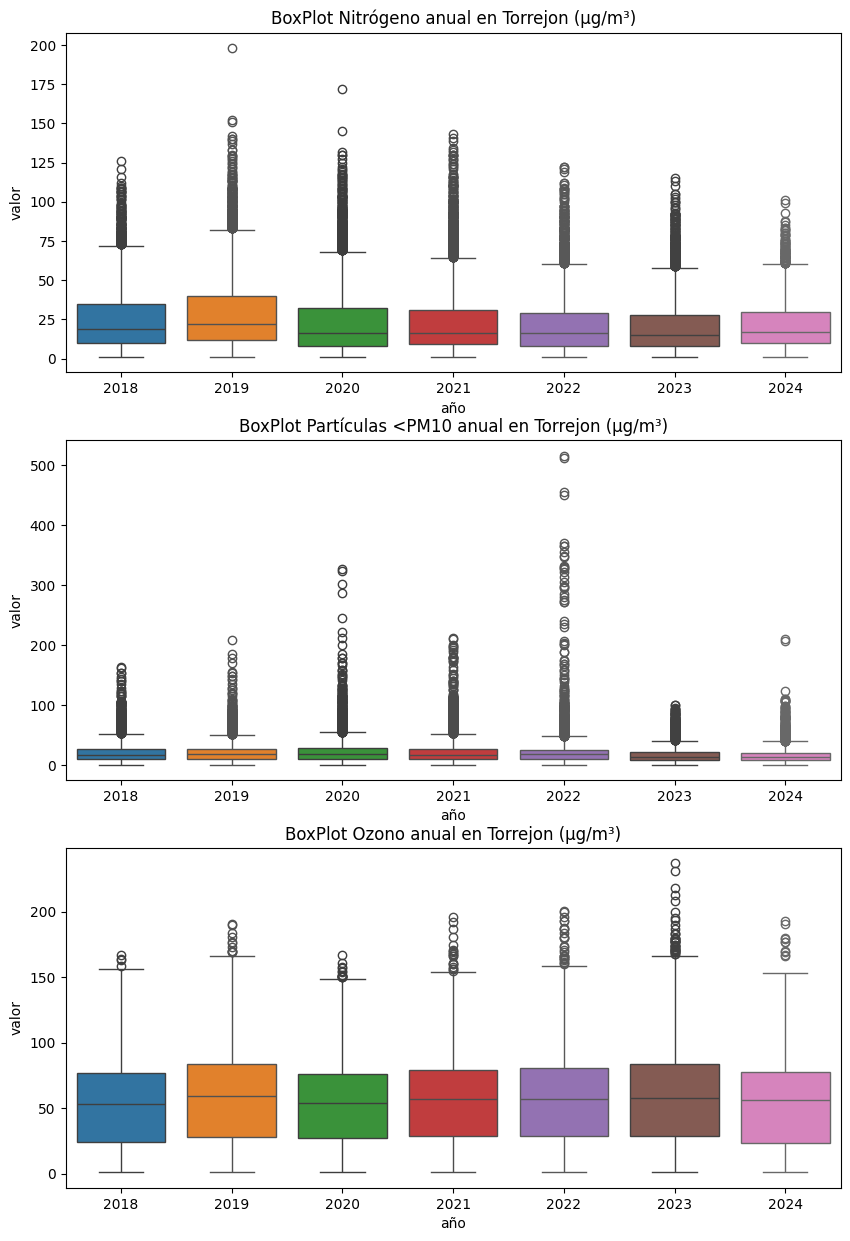

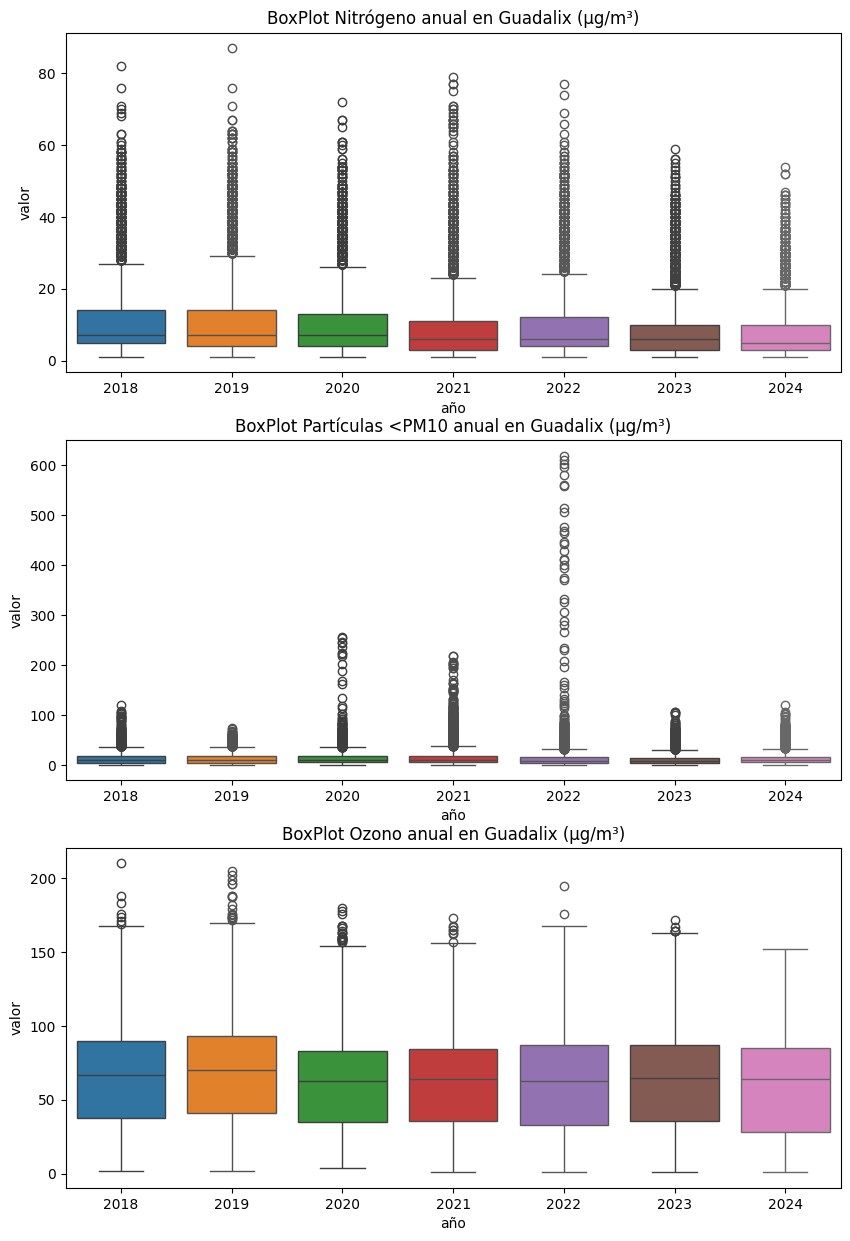

In [16]:

def boxplot(localidad):
    fig, axs = plt.subplots(3,1, figsize=(10, 15))
    for a in años: 
        if localidad == "Leganes":
            df_N = leg_N[a]
            df_P = leg_P[a]
            df_O = leg_O[a]
        elif localidad == "Guadalix":
            df_N = guad_N[a]
            df_P = guad_P[a]
            df_O = guad_O[a]
        elif localidad == "Torrejon":
            df_N = torr_N[a]
            df_P = torr_P[a]
            df_O = torr_O[a]
        sns.boxplot(x='año', y='valor', data=df_N, ax=axs[0])
        sns.boxplot(x='año', y='valor', data=df_P, ax=axs[1])
        sns.boxplot(x='año', y='valor', data=df_O, ax=axs[2])
    
    axs[0].set_title('BoxPlot Nitrógeno anual en ' + f'{localidad} (µg/m³)', fontsize=12)
    axs[1].set_title('BoxPlot Partículas <PM10 anual en ' + f'{localidad} (µg/m³)', fontsize=12)
    axs[2].set_title('BoxPlot Ozono anual en ' + f'{localidad} (µg/m³)', fontsize=12)
    
    plt.savefig(f'boxplot_{localidad}.png')
boxplot("Leganes")
boxplot("Torrejon")
boxplot("Guadalix")


Analizamos la serie temporal de cada uno de los contaminantes en cada una de las localidades escogidas. 
En primer lugar descomponemos la serie temporal en la tendencia, la componente estacional y el ruido. 

In [51]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 660.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/9.8 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.8 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.8 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.8 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.8 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.8 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.8 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.8 MB 1.8 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/9.8 MB 1.8 MB/s eta 0:00:06
   ---- ---------------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


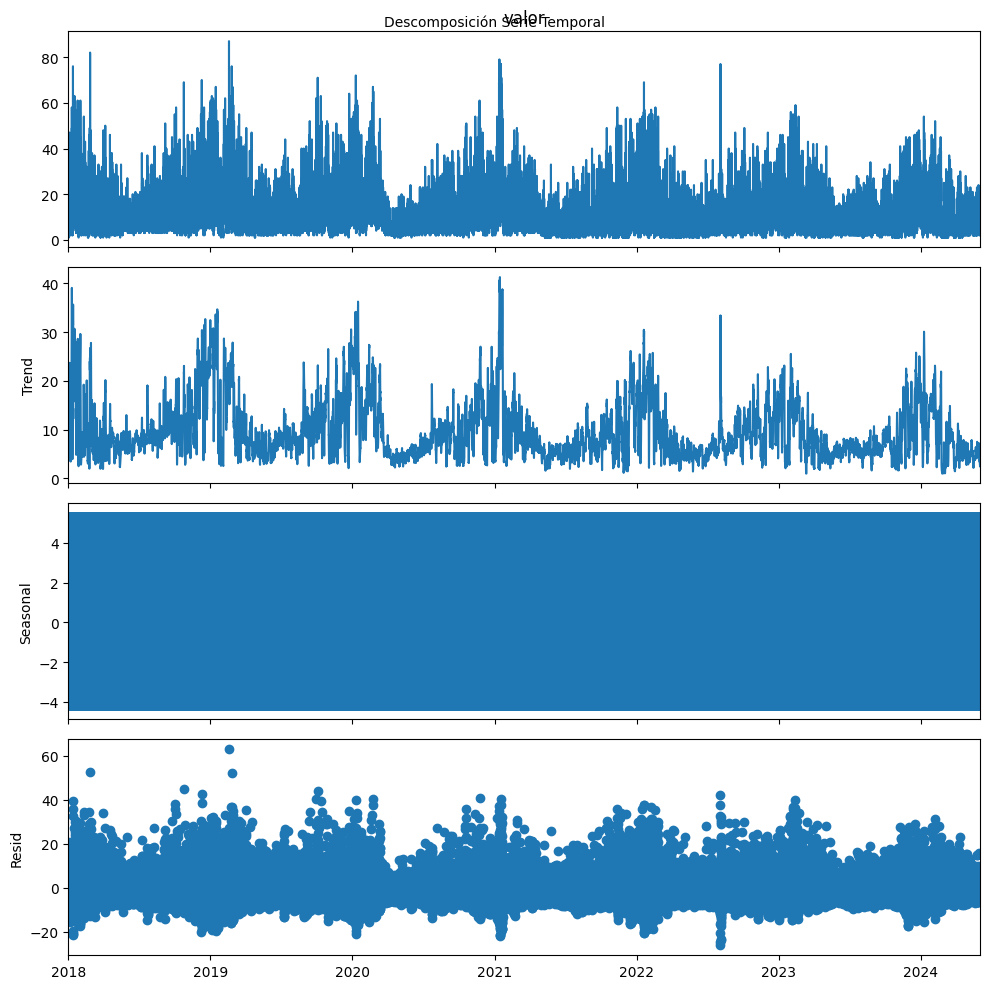

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

def plot_descomponer(dict_loc_mag):
    l_df = []
    for a in años:
        l_df.append(dict_loc_mag[a])
    df_t = pd.concat(l_df)
    df_t = df_t.reset_index(drop=True)
    df_t = df_t.set_index('fecha')[['valor']]
    descomp = seasonal_decompose(df_t['valor'], model='additive', extrapolate_trend='freq')
    plt.rcParams.update({'figure.figsize': (10,10)})
    descomp.plot().suptitle('Descomposición Serie Temporal', fontsize=10)
    plt.show()

plot_descomponer(guad_N)



LLevamos a cabo el test ADF para ver si la serie temporal para cada magnitud y cada localidad es estacionaria o no(ruido blanco). Consideramos como hipótesis nula H_0 ="la serie temporal es no estacionaria", luego si el P-valor obtenido es menor que el nivel de significancia alpha=0.05 podemos rechazar la hipótesis nula. 


In [77]:
from statsmodels.tsa.stattools import adfuller

#ADF_test devuelve True si la serie temporal es estacionaria y False en caso contrario 
def ADF_test(dict_loc_mag):
    l_df = []
    for a in años:
        l_df.append(dict_loc_mag[a])
    df_t = pd.concat(l_df)
    df_t = df_t.reset_index(drop=True)
    df_t = df_t.set_index('fecha')[['valor']]
    print(df_t)
    resultado = adfuller(df_t.valor.values, autolag='AIC')
    return (resultado[1], resultado[1] < 0.05)

l_estacionario = []
for dict_loc_mag in df_loc_mag:
    l_estacionario.append(ADF_test(dict_loc_mag))

l_estacionario 

                     valor
fecha                     
2018-01-01 00:00:00   71.0
2018-01-01 01:00:00   32.0
2018-01-01 02:00:00   29.0
2018-01-01 03:00:00   14.0
2018-01-01 04:00:00   13.0
...                    ...
2024-05-31 19:00:00   21.0
2024-05-31 20:00:00   23.0
2024-05-31 21:00:00   17.0
2024-05-31 22:00:00   12.0
2024-05-31 23:00:00    8.0

[56232 rows x 1 columns]
                     valor
fecha                     
2018-01-01 00:00:00   12.0
2018-01-01 01:00:00   48.0
2018-01-01 02:00:00   50.0
2018-01-01 03:00:00   55.0
2018-01-01 04:00:00   49.0
...                    ...
2024-05-31 19:00:00   87.0
2024-05-31 20:00:00   82.0
2024-05-31 21:00:00   82.0
2024-05-31 22:00:00   81.0
2024-05-31 23:00:00   79.0

[56232 rows x 1 columns]
                     valor
fecha                     
2018-01-01 00:00:00   28.0
2018-01-01 01:00:00   30.0
2018-01-01 02:00:00   21.0
2018-01-01 03:00:00   15.0
2018-01-01 04:00:00   15.0
...                    ...
2024-05-31 19:00:00    7.0
202

[(1.2556112646337675e-29, True),
 (9.376859812294561e-23, True),
 (0.0, True),
 (1.472520250293771e-29, True),
 (3.86441949413965e-21, True),
 (0.0, True),
 (1.0448685922953768e-27, True),
 (1.5619540794658864e-24, True),
 (0.0, True)]

 Sacamos las gráficas de autocorrelación/correlación parcial para el ozono en las 3 ciudades. 

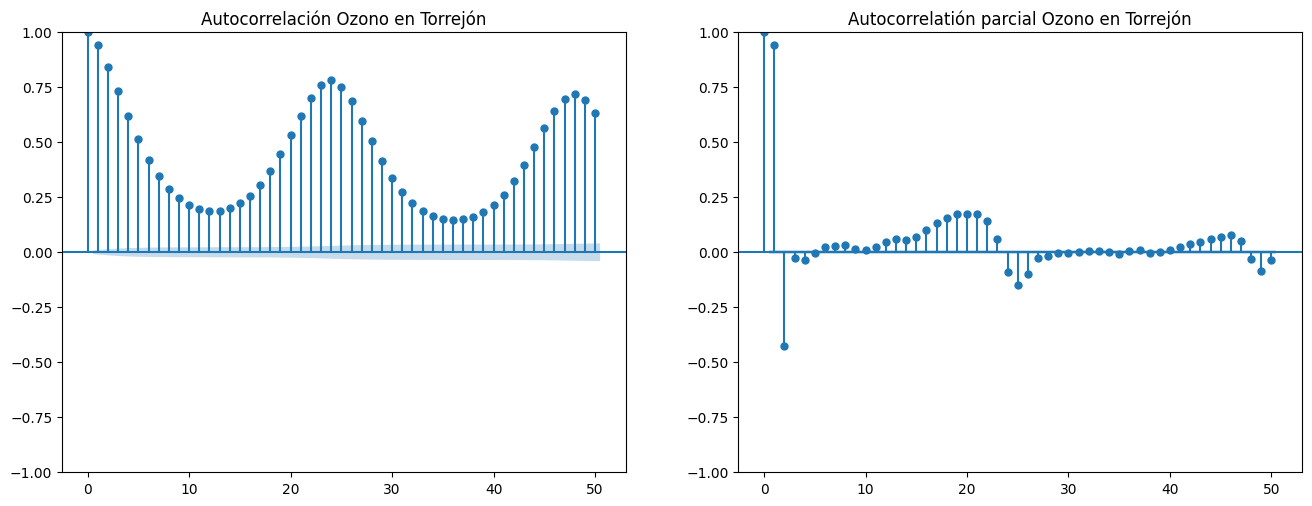

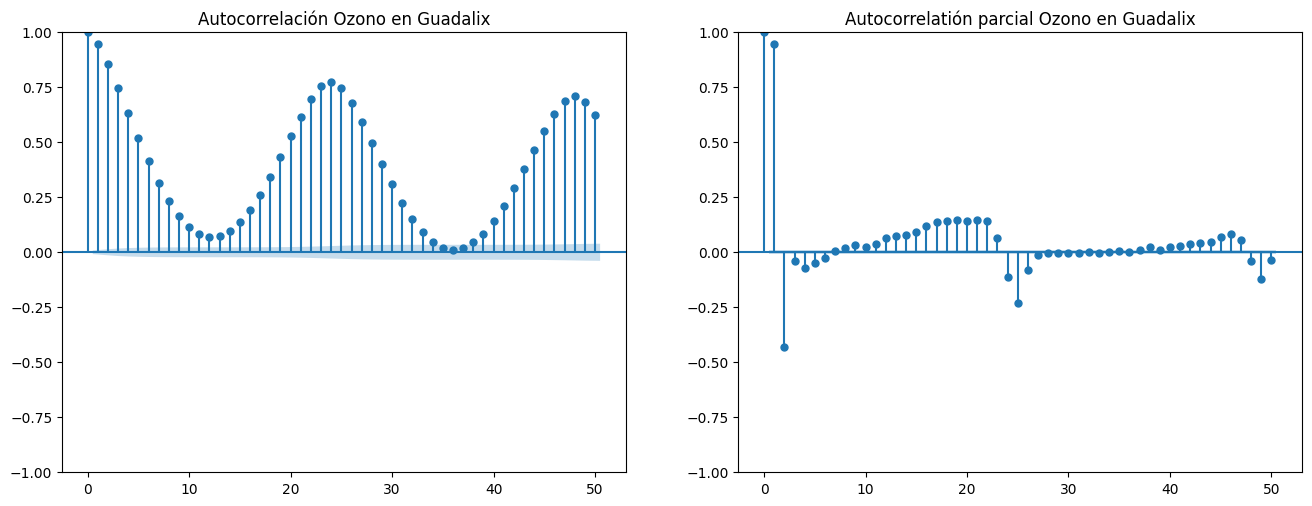

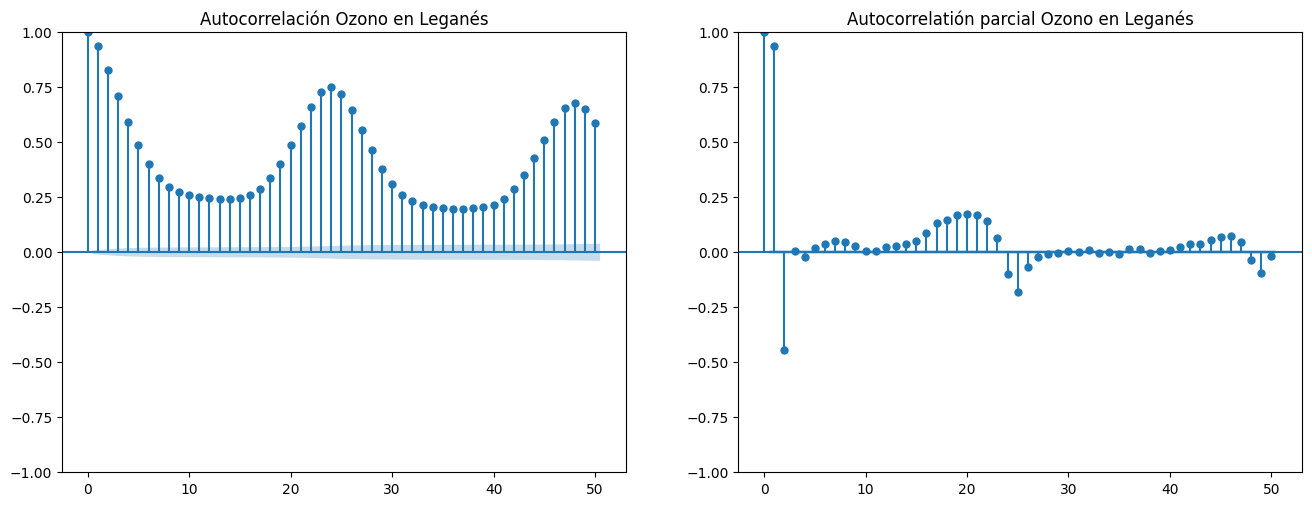

In [73]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_corr(dict_loc_mag, localidad):
    l_df = []
    for a in años:
        l_df.append(dict_loc_mag[a])
    df_t = pd.concat(l_df)
    df_t = df_t.reset_index(drop=True)
    df_t = df_t.set_index('fecha')[['valor']]
    fig, axes = plt.subplots(1,2,figsize=(16,5), dpi= 100)
    plot_acf(df_t.valor.tolist(), lags=50, ax=axes[0], title=f"Autocorrelación Ozono en {localidad}" )
    plot_pacf(df_t.valor.tolist(), lags=50, ax=axes[1], title=f"Autocorrelación parcial Ozono en {localidad}") 


######## como bajar el 1 en eje y 

plot_corr(torr_O, "Torrejón")
plot_corr(guad_O, "Guadalix")
plot_corr(leg_O, "Leganés")

Procedemos a limpiar y preparar la base de datos entera para poder entrenar la red neuronal. 

In [5]:
str_val = [f'v{str(i).zfill(2)}' for i in range(1, 25)]
str_horas = [f'h{str(i).zfill(2)}' for i in range(1, 25)]

#Sustituimos los valores no válidos y Nan por la media de la concentración para cada hora y magnitud 
def limpia_df(df):
    for m in magnitudes:
        for i in range(0,24): 
            val = str_val[i]
            hora = str_horas[i]
            #Cambiamos valores no válidos con magnitud m 
            df_val = df[(df[val] == "V") & (df["magnitud"] == m)]

            ind_v = df.index[(df[val] == 'N') & (df["magnitud"] == m)].tolist()

            df.loc[ind_v, val] = "V"
            df.loc[ind_v, hora] = df_val[hora].mean()
            #Sustituimos los valores Nan 
            ind_nan = df.index[(df[hora] == np.NaN) & (df["magnitud"] == m)].tolist() 
            df.loc[ind_nan, hora] = df_val[hora].mean()
    

for a in años:
    df = dataframes[a]
    limpia_df(df)




In [6]:
#Transformamos los dataframes para que tengan la forma municipio, estacion, magnitud, año, mes, dia 
#y normalizamos los datos. 
def transf_df(df):  
    df_unico = pd.melt(df, id_vars=['municipio', 'estacion', 'magnitud', 'ano', 'mes', 'dia'],
                      value_vars=str_horas, var_name='hora', value_name='valor')
    df_unico['hora_num'] = df_unico['hora'].str[1:].astype(int)
    df_unico.drop("hora", axis = 1, inplace=True)

    return df_unico

for a in años:
    df = dataframes[a]
    dataframes[a] = transf_df(df)

In [8]:
dataframes["2018"].iloc[23404]

municipio      67.0
estacion        1.0
magnitud       10.0
ano          2018.0
mes             2.0
dia            15.0
valor           7.0
hora_num        8.0
Name: 23404, dtype: float64

In [9]:
#Vemos que no hay valores Nan
df = dataframes["2022"]
#Calculamos cuantos valores no válidos hay 
n = df.isin([np.NaN])
n.sum()


 



municipio    0
estacion     0
magnitud     0
ano          0
mes          0
dia          0
valor        0
hora_num     0
dtype: int64

Ponemos los datos en el formato adecuado para entrenar la red neural y diseñamos la misma. 

PRIMER INTENTO RED 

In [131]:

import tensorflow as tf
import keras
from keras import layers

#Cada vector de entrada de la red está representado por un array cuyas entradas contienen los valores 
#de municipio, estacion, magnitud, año, mes, dia, hora. 


datos = np.empty((0, 7))
conc = np.empty(0)
for a in años:
    df = dataframes[a]
    df_datos = df.drop("valor", axis=1)
    df_conc = df["valor"]
    
    datos = np.vstack((datos, df_datos.to_numpy()))



    

In [132]:
df_total

,municipio,estacion,magnitud,ano,mes,dia,valor,hora_num
0,148,4,8,2018,1,1,43.0,1
1,148,4,10,2018,1,1,61.0,1
2,148,4,14,2018,1,1,31.0,1
3,67,1,8,2018,1,1,2.0,1
4,67,1,10,2018,1,1,1.0,1
...,...,...,...,...,...,...,...,...
506083,67,1,10,2024,5,31,20.0,24
506084,67,1,14,2024,5,31,78.0,24
506085,74,7,8,2024,5,31,8.0,24
506086,74,7,10,2024,5,31,8.0,24


In [ ]:

#Normalizamos los datos de entrada
for i in range(datos.shape[1]):
    min_val = np.min(datos[:, i])
    max_val = np.max(datos[:, i])
    if min_val == max_val:
        datos[:, i] = 0
    else:
        datos[:, i] = (datos[:, i] - min_val) / (max_val - min_val)



In [ ]:
#Dividimos el dataset en datos de entrenamiento y prueba 
prop_entren = 0.8
num_filas_entren = int(datos.shape[0] * prop_entren)

# Generar índices aleatorios
ind_aleat = np.random.permutation(datos.shape[0])

# Dividir el array en conjunto de entrenamiento y prueba
datos_entren = datos[ind_aleat[:num_filas_entren]]
conc_entren = conc[ind_aleat[:num_filas_entren]]

datos_prueba = datos[ind_aleat[num_filas_entren:]]
conc_prueba = conc[ind_aleat[num_filas_entren:]]

(datos_entren.shape[0],len(conc_entren))


column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [119]:
#Diseñamos la red neuronal 

model = keras.Sequential()

#model.add(keras.Input(shape=(7,1)))

# Add a LSTM layer with 128 internal units.
model.add(layers.Dense(64))
#model.add(layers.LSTM(32, activation="relu", input_shape=(7,1)))

#model.add(layers.Dense(30))

# Add a Dense layer with 10 units.
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
model.fit(datos_entren, conc_entren, batch_size=100, epochs=20)     





Epoch 1/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.0235 - loss: -498.3170
Epoch 2/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.0235 - loss: -498.3152
Epoch 3/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.0234 - loss: -498.1785
Epoch 4/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.0237 - loss: -496.3076
Epoch 5/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0235 - loss: -497.1814
Epoch 6/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.0232 - loss: -498.5385
Epoch 7/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0236 - loss: -497.5186
Epoch 8/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0230 - loss: -497.9372
Epoch 9/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0231 - loss: -498.8217
Epoch 10/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0232 - loss: -498.5591
Epoch 11/20
4049/4049 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0238 - loss: -498.9

Tutoría 19/07/2024
- Normalizar los datos 
- Probar con datos de las ciudades visualizadas 
- Mirar tutorial prediccion tiempo 

In [7]:
#Concatenamos los datos de cada año en un solo Dataframe    
l_df = []
for a in años:
    df = dataframes[a]
    l_df.append(df)

df_total = pd.concat(l_df, ignore_index=True)


#Creamos una columna para cada contaminante 
df_total = df_total.pivot_table(index=['municipio', 'estacion', 'ano', 'mes', 'dia', 'hora_num'],
                         columns='magnitud',
                         values='valor') 

df_total.columns = [f'{col}' for col in df_total.columns]
df_total = df_total.reset_index()




In [8]:
df_total

,municipio,estacion,ano,mes,dia,hora_num,8,10,14
0,67,1,2018,1,1,1,2.0,1.0,86.0
1,67,1,2018,1,1,2,5.0,1.0,80.0
2,67,1,2018,1,1,3,5.0,5.0,75.0
3,67,1,2018,1,1,4,2.0,3.0,87.0
4,67,1,2018,1,1,5,4.0,4.0,73.0
...,...,...,...,...,...,...,...,...,...
168691,148,4,2024,5,31,20,11.0,11.0,95.0
168692,148,4,2024,5,31,21,11.0,9.0,83.0
168693,148,4,2024,5,31,22,8.0,11.0,84.0
168694,148,4,2024,5,31,23,5.0,12.0,85.0


In [24]:
# Creamos un diccionario con los DataFrames de cada ciudad 
df_dict = {}

for municipio, estacion in est:
    df_estacion = df_total[(df_total['municipio'] == municipio) & (df_total['estacion'] == estacion)]
    
    df_key = f'({municipio},{estacion})'
    df_dict[df_key] = df_estacion 

# Mostrar dataframes 
for key, value in df_dict.items():
    print(f"DataFrame para {key}:")
    print(value, "\n")

DataFrame para (5,2):
       municipio  estacion   ano  mes  dia  hora_num     8    10    14
0              5         2  2018    1    1         1  68.0  13.0  20.0
1              5         2  2018    1    1         2  71.0   8.0   9.0
2              5         2  2018    1    1         3  52.0  22.0  25.0
3              5         2  2018    1    1         4  35.0  23.0  39.0
4              5         2  2018    1    1         5  17.0   6.0  58.0
...          ...       ...   ...  ...  ...       ...   ...   ...   ...
56227          5         2  2024    5   31        20  22.0  12.0  85.0
56228          5         2  2024    5   31        21  36.0  16.0  68.0
56229          5         2  2024    5   31        22  15.0  15.0  80.0
56230          5         2  2024    5   31        23   9.0  14.0  78.0
56231          5         2  2024    5   31        24   6.0  15.0  79.0

[56232 rows x 9 columns] 

DataFrame para (6,4):
        municipio  estacion   ano  mes  dia  hora_num     8    10    14
5623

Normalizamos los datos 

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_nor = ['municipio', 'estacion', 'ano', 'mes', 'dia', 'hora_num']
df_red = df_total.copy()
df_total[col_nor] = scaler.fit_transform(df_total[col_nor])



column_indices = {name: i for i, name in enumerate(df_total.columns)}
n = len(df_total)
train_df = df_total[0:int(n*0.7)]
val_df = df_total[int(n*0.7):int(n*0.9)]
test_df = df_total[int(n*0.9):]

con_8_train = train_df["8"].copy()
con_10_train = train_df["10"].copy()
con_14_train = train_df["14"].copy()
#df_datos_train = train_df.drop(["8", "10", "14"], axis = 1)
df_datos_train = train_df.drop(["10"], axis = 1)

con_8_val = val_df["8"].copy()
con_10_val = val_df["10"].copy()
con_14_val = val_df["14"].copy()
#df_datos_val = val_df.drop(["8", "10", "14"], axis = 1)
df_datos_val = val_df.drop(["10"], axis = 1)



con_8_test = test_df["8"].copy()
con_10_test = test_df["10"].copy()
con_14_test = test_df["14"].copy()
#df_datos_test = test_df.drop(["8", "10", "14"], axis = 1)
df_datos_test = test_df.drop(["10"], axis = 1)





X = df_datos_train.to_numpy()
Y = con_10_train.to_numpy()

X_val = df_datos_val.to_numpy()
Y_val = con_10_val.to_numpy() 

X_test = df_datos_test.to_numpy()
Y_test = con_10_test.to_numpy()






,municipio,estacion,ano,mes,dia,hora_num
0,-0.800463,-1.224745e+00,-1.46394,-1.528649,-1.673707,-1.661325
1,-0.800463,-1.224745e+00,-1.46394,-1.528649,-1.673707,-1.516862
2,-0.800463,-1.224745e+00,-1.46394,-1.528649,-1.673707,-1.372399
3,-0.800463,-1.224745e+00,-1.46394,-1.528649,-1.673707,-1.227936
4,-0.800463,-1.224745e+00,-1.46394,-1.528649,-1.673707,-1.083473
...,...,...,...,...,...,...
118082,1.409907,-1.166201e-16,-1.46394,0.491932,0.826812,-1.372399
118083,1.409907,-1.166201e-16,-1.46394,0.491932,0.826812,-1.227936
118084,1.409907,-1.166201e-16,-1.46394,0.491932,0.826812,-1.083473
118085,1.409907,-1.166201e-16,-1.46394,0.491932,0.826812,-0.939010


In [40]:
import tensorflow as tf
import keras
from keras import layers
model = keras.Sequential()


 
#model.add(keras.Input(shape=(7,1)))

model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(100, activation="tanh"))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(30, activation = 'tanh'))

# Add a Dense layer with 10 units.
model.add(layers.Dense(1))

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mean_squared_error',  # O 'mean_absolute_error' según el caso
              metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(X, Y, batch_size=32, epochs=100)     


Epoch 1/100
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 414.8170 - mean_absolute_error: 11.5634 - mean_squared_error: 414.8170
Epoch 2/100
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 322.0043 - mean_absolute_error: 10.1509 - mean_squared_error: 322.0042
Epoch 3/100
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 284.8403 - mean_absolute_error: 9.0487 - mean_squared_error: 284.8403
Epoch 4/100
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 276.3153 - mean_absolute_error: 8.7081 - mean_squared_error: 276.3153
Epoch 5/100
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 268.2417 - mean_absolute_error: 8.4687 - mean_squared_error: 268.2417
Epoch 6/100
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 259.7274 - mean_absolute_error: 8.3412 - mean_squared_error: 259.7274
Epoch 7/100
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 249.4969 - mean_absolute_error: 8.1497 - mean_squared_error: 249.4969
Epoch 8/100
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - lo

1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 349.1274 - mean_absolute_error: 13.2524 - mean_squared_error: 349.1279
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
MSE: 299.8949125065474
MAE: 13.697729920355018
R2-Score: -0.5905460642989153


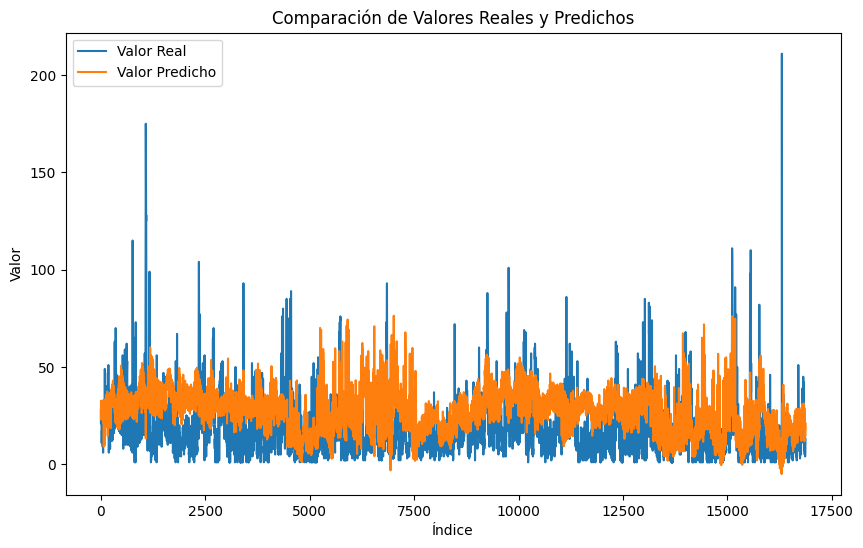

In [38]:
# Evaluar el modelo en el conjunto de prueba
results = model.evaluate(X_val, Y_val)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Hacer predicciones
Y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2-Score: {r2}')



plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Valor Real')
plt.plot(Y_pred, label='Valor Predicho')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación de Valores Reales y Predichos')
plt.legend()
plt.show()


